<a href="https://colab.research.google.com/github/asmipulgam/Codsoft/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [12]:
ld=pd.read_csv("loan.csv")

In [13]:
ld.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [14]:
type(ld)

pandas.core.frame.DataFrame

In [15]:
ld.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,False,False,False,False,False,False,False,False,False,False,False,False,False
377,False,False,False,False,False,False,False,False,False,False,False,False,False
378,False,False,False,False,False,False,False,False,False,False,False,False,False
379,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
ld.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
ld=ld.dropna()

In [18]:
ld.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
ld.notnull().count()

Loan_ID              308
Gender               308
Married              308
Dependents           308
Education            308
Self_Employed        308
ApplicantIncome      308
CoapplicantIncome    308
LoanAmount           308
Loan_Amount_Term     308
Credit_History       308
Property_Area        308
Loan_Status          308
dtype: int64

In [20]:
ld["Dependents"].value_counts()

Dependents
0     194
2      47
1      43
3+     24
Name: count, dtype: int64

In [21]:
ld["Loan_Status"].value_counts()

Loan_Status
Y    219
N     89
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

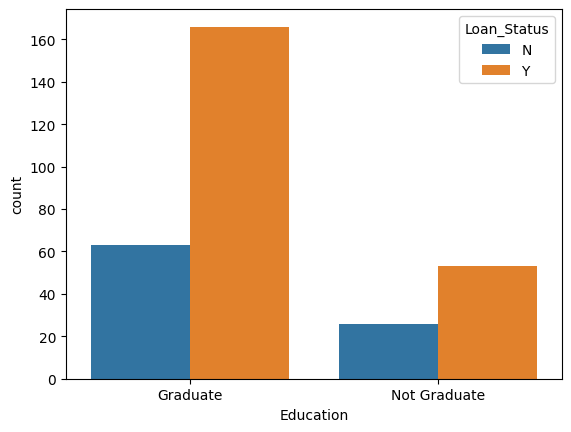

In [22]:
sb.countplot(x='Education',hue='Loan_Status',data=ld)

# New Section

<Axes: xlabel='Property_Area', ylabel='count'>

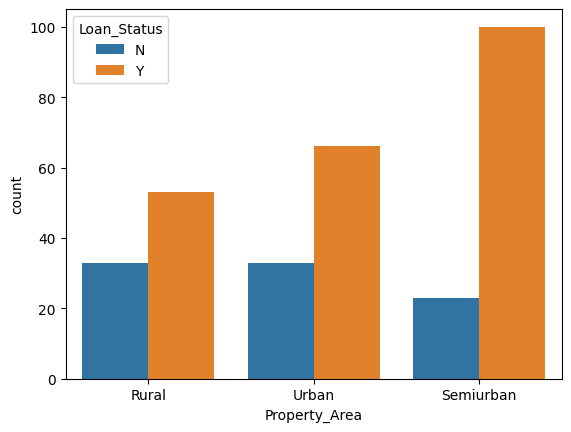

In [23]:
sb.countplot(x='Property_Area',hue='Loan_Status',data=ld)

<Axes: xlabel='Married', ylabel='count'>

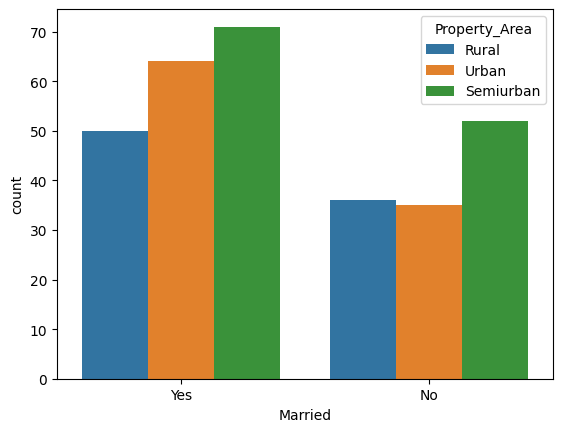

In [24]:
sb.countplot(x='Married',hue='Property_Area',data=ld)

In [34]:
ld.replace({"Married":{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0}})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,1,1,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,1,1,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,1,1,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [26]:
x=ld.drop(columns={"Loan_ID","Loan_Status"},axis=1)
print(x)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male     Yes          1      Graduate            No             4583   
1      Male     Yes          0      Graduate           Yes             3000   
2      Male     Yes          0  Not Graduate            No             2583   
3      Male      No          0      Graduate            No             6000   
4      Male     Yes          0  Not Graduate            No             2333   
..      ...     ...        ...           ...           ...              ...   
376    Male     Yes         3+      Graduate            No             5703   
377    Male     Yes          0      Graduate            No             3232   
378  Female      No          0      Graduate            No             2900   
379    Male     Yes         3+      Graduate            No             4106   
380  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [27]:
y=ld["Loan_Status"]
print(y)

0      N
1      Y
2      Y
3      Y
4      Y
      ..
376    Y
377    Y
378    Y
379    Y
380    N
Name: Loan_Status, Length: 308, dtype: object


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=5)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(308, 11) (246, 11) (62, 11)
